In [ ]:
s

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


In [126]:
# import random
# random.seeds(113)

AttributeError: module 'random' has no attribute 'seeds'

Data fields
Input variables:

# bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


# other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


# social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target): 
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Clean Train data

In [2]:
data= pd.read_csv('./datasets/train.csv',sep=";")
data.shape

(2999, 21)

In [3]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
data.head().T

,0,1,2,3,4
age,30,39,25,38,47
job,blue-collar,services,services,services,admin.
marital,married,single,married,married,married
education,basic.9y,high.school,high.school,basic.9y,university.degree
default,no,no,no,no,no
housing,yes,no,yes,unknown,yes
loan,no,no,no,unknown,no
contact,cellular,telephone,telephone,telephone,cellular
month,may,may,jun,jun,nov
day_of_week,fri,fri,wed,fri,mon


In [5]:
#data.marital.value_counts(normalize=True)
data.housing=data['housing'].replace({'unknown': 'divorced'})
data.housing.value_counts(normalize=True)

yes         0.529843
no          0.444481
divorced    0.025675
Name: housing, dtype: float64

In [6]:
#data.education.value_counts(normalize=True)
#Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.

data['education']=np.where(data['education'] =='basic.9y', 'basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'basic', data['education'])

data.education=data['education'].replace({'unknown': 'professional.course'})
data.education.value_counts(normalize=True)

university.degree      0.305102
basic                  0.295098
high.school            0.226742
professional.course    0.173058
Name: education, dtype: float64

In [7]:
data.pdays=data.pdays.map(lambda x: 0 if x == 999 else x)
data.pdays.value_counts(normalize=True)

0     0.963321
3     0.013004
6     0.009336
4     0.003334
7     0.002668
10    0.001667
5     0.001334
12    0.001334
2     0.001000
15    0.000667
1     0.000667
18    0.000667
11    0.000333
9     0.000333
16    0.000333
Name: pdays, dtype: float64

In [8]:

data.default.value_counts(normalize=True)


no         0.801267
unknown    0.198733
Name: default, dtype: float64

In [9]:
data.contact.value_counts(normalize=True)

cellular     0.645215
telephone    0.354785
Name: contact, dtype: float64

In [10]:
#data.housing.value_counts(normalize=True)
data.housing=data['housing'].replace({'unknown': 'no'})
data.housing.value_counts()

yes         1589
no          1333
divorced      77
Name: housing, dtype: int64

In [11]:
data.loan.value_counts(normalize=True)
data.loan=data['loan'].replace({'unknown': 'yes'})
data.loan.value_counts()

no     2437
yes     562
Name: loan, dtype: int64

In [12]:
data.job.value_counts(normalize=True)

admin.           0.247749
blue-collar      0.214738
technician       0.165388
services         0.098033
management       0.077693
retired          0.039346
self-employed    0.038013
entrepreneur     0.037346
unemployed       0.028343
housemaid        0.023341
student          0.019340
unknown          0.010670
Name: job, dtype: float64

In [13]:
data.job=data['job'].replace({'unknown': 'admin.'})
data.job=data['job'].replace({'admin.': 'admin'})
data.job.value_counts()

admin            775
blue-collar      644
technician       496
services         294
management       233
retired          118
self-employed    114
entrepreneur     112
unemployed        85
housemaid         70
student           58
Name: job, dtype: int64

In [14]:
data.marital.value_counts(normalize=True)

married     0.604201
single      0.285428
divorced    0.107369
unknown     0.003001
Name: marital, dtype: float64

In [15]:
data.marital=data['marital'].replace({'unknown': 'divorced'})
data.marital.value_counts()#, 'b': 'y', 'c': 'w', 'd': 'z'})

married     1812
single       856
divorced     331
Name: marital, dtype: int64

In [16]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

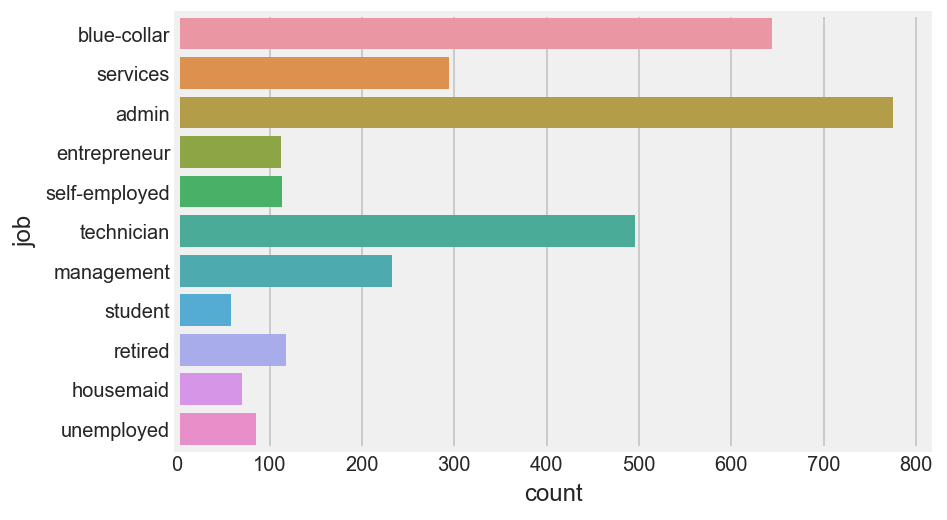

In [17]:
sns.countplot(y="job", data=data)
plt.show()

<function matplotlib.pyplot.show>

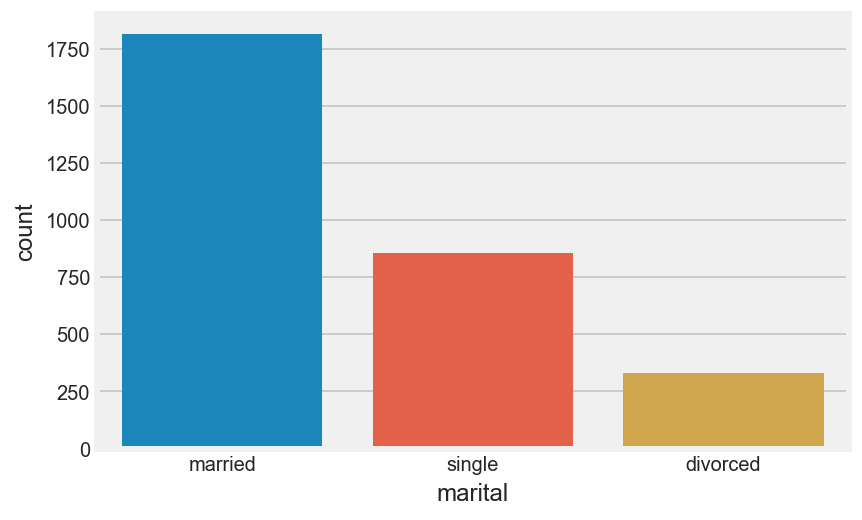

In [18]:
sns.countplot(x="marital",data=data)
plt.show

<function matplotlib.pyplot.show>

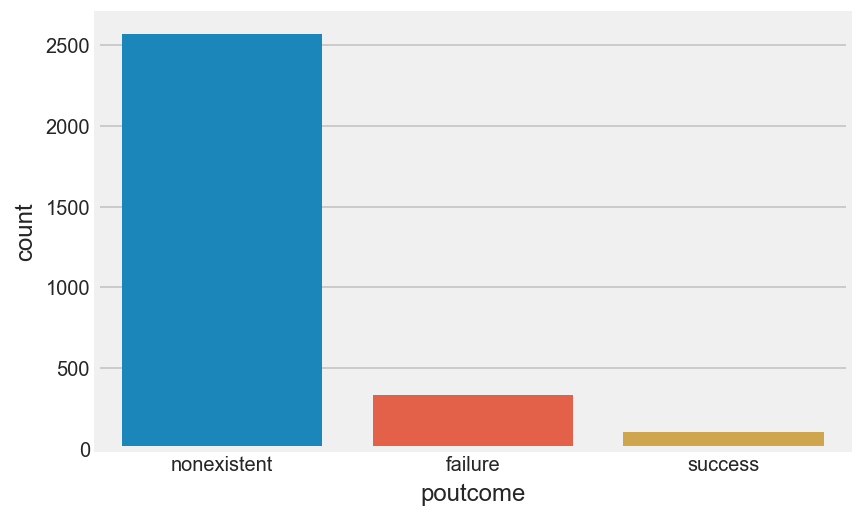

In [19]:
sns.countplot(x="poutcome",data=data)
plt.show

In [20]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.673538,216.016867,2.602699,0.087706,0.141304,0.216154,93.596114,-40.654273,3.769919,5174.121852
yes,41.628399,569.990937,1.915408,1.132931,0.601208,-1.025680,93.491360,-39.965257,2.282650,5097.293656


In [21]:
# data.education=data.education.map(lambda x: 1 if x == 'university.degree' else x)
# data.education=data.education.map(lambda x: 2 if x == 'high.school' else x)
# data.education=data.education.map(lambda x: 3 if x == 'Basic' else x)
# data.education=data.education.map(lambda x: 4 if x == 'professional.course' else x)
# data.education=data.education.map(lambda x: 5 if x == 'basic.4y' else x)
# data.education=data.education.map(lambda x: 6 if x == 'basic.6y' else x)
# data.education=data.education.map(lambda x: 5 if x == 'unknown' else x)


# Rename

In [22]:
data.rename(columns={'default': 'have_credit_by_default','housing':'housing_loan',
                     'loan':'personal_loan','contact':'communication_type','day_of_week':'last_contact_day',
                     'duration':'last_contact_duration','campaign':'no_contact_with_client',
                     'poutcome':'outcome_previous_campaign','pdays':'n_days_clcontact_prev_campaign'}, inplace=True)
data.rename(columns={
        'emp.var.rate':'emp_var_rate',
        'cons.price.idx':'cons_price_idx',
        'nr.employed': 'nr_employees',
        'cons.conf.idx':'cons_conf_idx'
            }, inplace=True)
#rename variables to be able to analyse

In [23]:
col_del=['nr_employees','euribor3m','outcome_previous_campaign']
data.drop(columns=col_del,inplace=True)

In [24]:
data = pd.get_dummies(data, columns =['job', 'marital', 'have_credit_by_default', 'housing_loan', 'personal_loan', 'communication_type','education','last_contact_day','month'])

In [25]:
data.isnull().sum()

age                               0
last_contact_duration             0
no_contact_with_client            0
n_days_clcontact_prev_campaign    0
previous                          0
emp_var_rate                      0
cons_price_idx                    0
cons_conf_idx                     0
y                                 0
job_admin                         0
job_blue-collar                   0
job_entrepreneur                  0
job_housemaid                     0
job_management                    0
job_retired                       0
job_self-employed                 0
job_services                      0
job_student                       0
job_technician                    0
job_unemployed                    0
marital_divorced                  0
marital_married                   0
marital_single                    0
have_credit_by_default_no         0
have_credit_by_default_unknown    0
housing_loan_divorced             0
housing_loan_no                   0
housing_loan_yes            

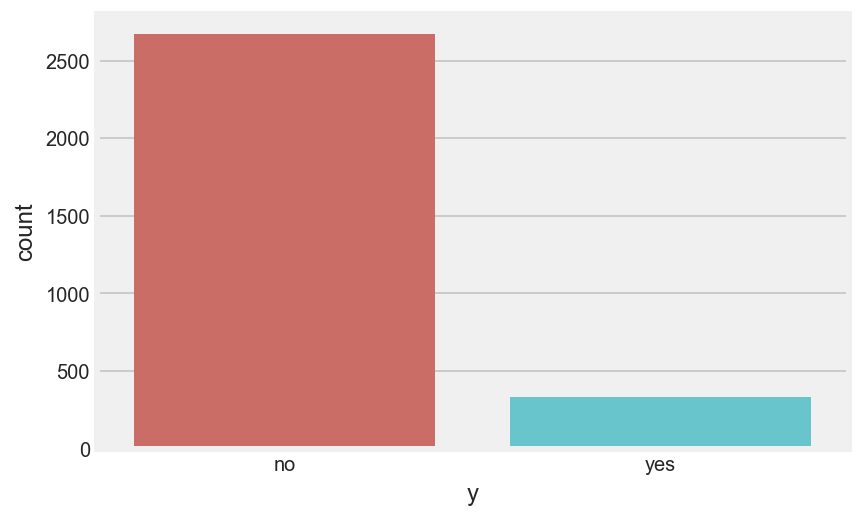

In [26]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [27]:
data.columns

Index(['age', 'last_contact_duration', 'no_contact_with_client',
       'n_days_clcontact_prev_campaign', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'y', 'job_admin', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'have_credit_by_default_no',
       'have_credit_by_default_unknown', 'housing_loan_divorced',
       'housing_loan_no', 'housing_loan_yes', 'personal_loan_no',
       'personal_loan_yes', 'communication_type_cellular',
       'communication_type_telephone', 'education_basic',
       'education_high.school', 'education_professional.course',
       'education_university.degree', 'last_contact_day_fri',
       'last_contact_day_mon', 'last_contact_day_thu', 'last_contact_day_tue',
       'last_contact_day_wed', 'month_apr', 'month_aug', 'mo

In [28]:
data.dtypes

age                                 int64
last_contact_duration               int64
no_contact_with_client              int64
n_days_clcontact_prev_campaign      int64
previous                            int64
emp_var_rate                      float64
cons_price_idx                    float64
cons_conf_idx                     float64
y                                  object
job_admin                           uint8
job_blue-collar                     uint8
job_entrepreneur                    uint8
job_housemaid                       uint8
job_management                      uint8
job_retired                         uint8
job_self-employed                   uint8
job_services                        uint8
job_student                         uint8
job_technician                      uint8
job_unemployed                      uint8
marital_divorced                    uint8
marital_married                     uint8
marital_single                      uint8
have_credit_by_default_no         

In [29]:
data.isnull().sum()

age                               0
last_contact_duration             0
no_contact_with_client            0
n_days_clcontact_prev_campaign    0
previous                          0
emp_var_rate                      0
cons_price_idx                    0
cons_conf_idx                     0
y                                 0
job_admin                         0
job_blue-collar                   0
job_entrepreneur                  0
job_housemaid                     0
job_management                    0
job_retired                       0
job_self-employed                 0
job_services                      0
job_student                       0
job_technician                    0
job_unemployed                    0
marital_divorced                  0
marital_married                   0
marital_single                    0
have_credit_by_default_no         0
have_credit_by_default_unknown    0
housing_loan_divorced             0
housing_loan_no                   0
housing_loan_yes            

In [30]:
data.y=data.y.map(lambda x: 1 if x == 'yes' else 0)


In [31]:
col=['communication_type_cellular','communication_type_telephone','personal_loan_no','personal_loan_yes','have_credit_by_default_no','have_credit_by_default_unknown','emp_var_rate','housing_loan_no','housing_loan_yes']

In [32]:
data.groupby(data['y']> 0)[col].sum().sort_values(by=['communication_type_cellular','communication_type_telephone'],ascending=True)

,communication_type_cellular,communication_type_telephone,personal_loan_no,personal_loan_yes,have_credit_by_default_no,have_credit_by_default_unknown,emp_var_rate,housing_loan_no,housing_loan_yes
y,,,,,,,,,
True,271.0,60.0,275.0,56.0,289.0,42.0,-339.5,153.0,173.0
False,1664.0,1004.0,2162.0,506.0,2114.0,554.0,576.7,1180.0,1416.0


In [33]:
y = data.y.values
X = data.drop('y', axis=1)

In [34]:
# calculate the baseline accuracy:
data.y.value_counts(normalize=True)

0    0.88963
1    0.11037
Name: y, dtype: float64

In [35]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\jasper\downloads\download\anaconda\lib\site-packages (0.3.3)


In [36]:
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [37]:
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f1: {}".format(f1_score(true_value, pred)))


In [38]:
# our classifier to use
classifier = RandomForestClassifier

In [39]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to standardize the X design matrix
Xs = ss.fit_transform(X)
#print(Xs.values)
print(Xs)
# Standardization is necessary for regularized regression because the beta
# values for each predictor variable must be on the same scale. If betas
# are different sizes just because of the scale of predictor variables
# the regularization term can't determine which betas are more/less 
# important based on their size.

[[-0.96194567  0.90512938 -0.20607401 ... -0.34621608 -0.13283472
  -0.13021098]
 [-0.08650311  0.35482751  0.57622466 ... -0.34621608 -0.13283472
  -0.13021098]
 [-1.44830265 -0.10961166 -0.59722334 ... -0.34621608 -0.13283472
  -0.13021098]
 ...
 [ 1.95619622  0.32360471 -0.20607401 ... -0.34621608  7.52815229
  -0.13021098]
 [-0.76740288  0.89732368 -0.59722334 ...  2.88836963 -0.13283472
  -0.13021098]
 [ 2.63709599  0.1752964   0.18507533 ... -0.34621608 -0.13283472
  -0.13021098]]


In [40]:
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(Xs, y, random_state=2)



In [41]:
# build normal model
pipeline = make_pipeline(classifier(random_state=42))
model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), classifier(random_state=42))
smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

# build model with undersampling
nearmiss_pipeline = make_pipeline_imb(NearMiss(random_state=42), classifier(random_state=42))
nearmiss_model = nearmiss_pipeline.fit(X_train, y_train)
nearmiss_prediction = nearmiss_model.predict(X_test)


In [42]:
# print information about both models
print()
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(Xs, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))
X_nearmiss, y_nearmiss = NearMiss().fit_sample(Xs, y)
print("NearMiss data distribution: {}".format(Counter(y_nearmiss)))


normal data distribution: Counter({0: 2668, 1: 331})
SMOTE data distribution: Counter({0: 2668, 1: 2668})
NearMiss data distribution: Counter({0: 331, 1: 331})


In [43]:
# classification report
print(classification_report(y_test, prediction))
print(classification_report_imbalanced(y_test, smote_prediction))


             precision    recall  f1-score   support

          0       0.92      0.97      0.94       667
          1       0.53      0.29      0.38        83

avg / total       0.87      0.89      0.88       750

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.96      0.33      0.94      0.56      0.33       667
          1       0.52      0.33      0.96      0.40      0.56      0.29        83

avg / total       0.88      0.89      0.40      0.88      0.56      0.33       750



In [44]:
print()
print('normal Pipeline Score {}'.format(pipeline.score(X_test, y_test)))
print('SMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))
print('NearMiss Pipeline Score {}'.format(nearmiss_pipeline.score(X_test, y_test)))



normal Pipeline Score 0.8933333333333333
SMOTE Pipeline Score 0.892
NearMiss Pipeline Score 0.652


In [45]:
print()
print_results("normal classification", y_test, prediction)
print()
print_results("SMOTE classification", y_test, smote_prediction)
print()
print_results("NearMiss classification", y_test, nearmiss_prediction)


normal classification
accuracy: 0.8933333333333333
precision: 0.5333333333333333
recall: 0.2891566265060241
f1: 0.375

SMOTE classification
accuracy: 0.892
precision: 0.5192307692307693
recall: 0.3253012048192771
f1: 0.4

NearMiss classification
accuracy: 0.652
precision: 0.22012578616352202
recall: 0.8433734939759037
f1: 0.3491271820448878


In [46]:
from sklearn.model_selection import KFold

# cross validation done right
kf = KFold(n_splits=5, random_state=42)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
for train, test in kf.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), classifier(random_state=42))
    model = pipeline.fit(X_train[train], y_train[train])
    prediction = model.predict(X_train[test])

    accuracy.append(pipeline.score(X_train[test], y_train[test]))
    precision.append(precision_score(y_train[test], prediction))
    recall.append(recall_score(y_train[test], prediction))
    f1.append(f1_score(y_train[test], prediction))
    auc.append(roc_auc_score(y_train[test], prediction))

print()
print("done right mean of scores 5-fold:")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))
print()


done right mean of scores 5-fold:
accuracy: 0.8950705270972531
precision: 0.5559826695729332
recall: 0.3500437263371194
f1: 0.42132750874878433



             precision    recall  f1-score   support

          0       0.94      0.77      0.85       670
          1       0.24      0.62      0.35        80

avg / total       0.87      0.75      0.79       750

Automatically created module for IPython interactive environment


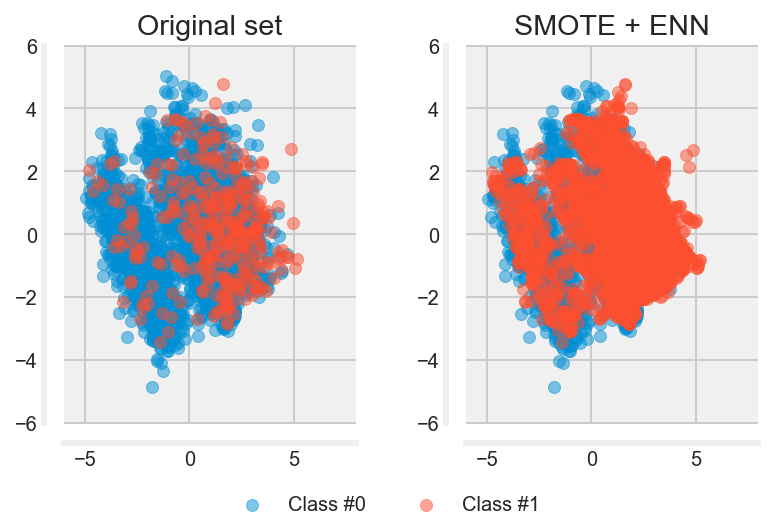

In [47]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
# Xs, y = make_classification(n_classes=2, class_sep=2,
# weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
# n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
# print('Original dataset shape {}'.format(Counter(y)))
#Original dataset shape Counter({1: 900, 0: 100})
pca = PCA()
smt = SMOTE(random_state=42)
knn = KNN()
pipeline = Pipeline([('smt', smt), ('pca', pca), ('knn', knn)])
X_train, X_test, y_train, y_test = tts(Xs, y, random_state=42)
pipeline.fit(X_train, y_train) 
#Pipeline(...)
y_hat = pipeline.predict(X_test)
print(classification_report(y_test, y_hat))
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.combine import SMOTEENN

print(__doc__)

# Generate the dataset
#X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
#                            n_informative=3, n_redundant=1, flip_y=0,
#                            n_features=20, n_clusters_per_class=1,
#                            n_samples=100, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(Xs)

# Apply SMOTE + ENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(Xs, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=0.5)
ax2.set_title('SMOTE + ENN')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

f.legend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
         ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

Automatically created module for IPython interactive environment


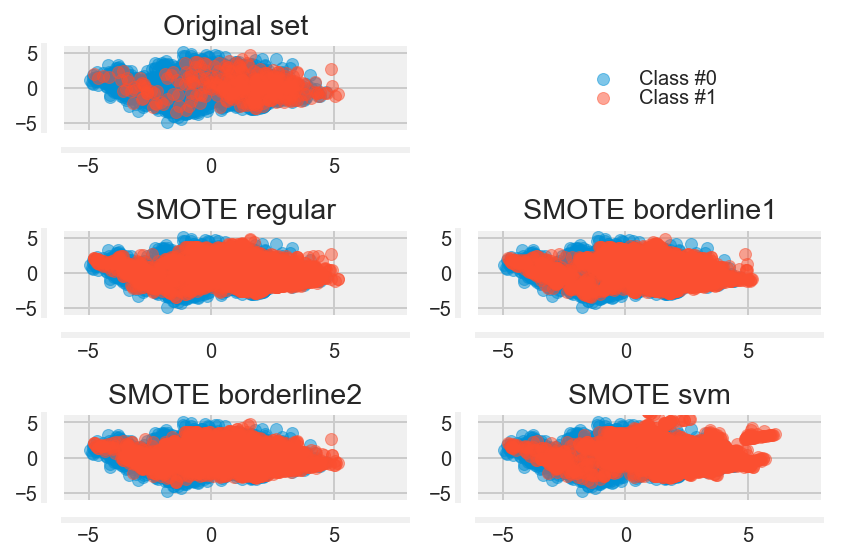

In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Generate the dataset
#X, y = make_classification(n_classes=2, class_sep=2, weights=[0.3, 0.7],
                          # n_informative=3, n_redundant=1, flip_y=0,
                          # n_features=20, n_clusters_per_class=1,
                          # n_samples=80, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(Xs)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(Xs, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()

# Logistic regression

In [49]:
sm = SMOTEENN() #USE SMOTEEN
X_resampled, y_resampled = sm.fit_sample(Xs, y)

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Feature Selection

In [51]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

rfe = RFE(lg, 18)
rfe = rfe.fit(X_resampled, y_resampled )
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True False  True  True  True False False False False
  True False  True False False False False  True False False False False
  True False False False False  True  True False False  True  True False
 False False False False False False  True False False  True  True  True
  True False]
[ 6  1  2  1 28  1  1  1 11 29  3  5  1 12  1  9 27  7 13  1 22 23 33 32
  1 26 25  8 17  1  1 24 10  1  1 15 30 16 31 18 14 21  1 20  4  1  1  1
  1 19]


In [52]:
list(zip(rfe.support_,X))

[(False, 'age'),
 (True, 'last_contact_duration'),
 (False, 'no_contact_with_client'),
 (True, 'n_days_clcontact_prev_campaign'),
 (False, 'previous'),
 (True, 'emp_var_rate'),
 (True, 'cons_price_idx'),
 (True, 'cons_conf_idx'),
 (False, 'job_admin'),
 (False, 'job_blue-collar'),
 (False, 'job_entrepreneur'),
 (False, 'job_housemaid'),
 (True, 'job_management'),
 (False, 'job_retired'),
 (True, 'job_self-employed'),
 (False, 'job_services'),
 (False, 'job_student'),
 (False, 'job_technician'),
 (False, 'job_unemployed'),
 (True, 'marital_divorced'),
 (False, 'marital_married'),
 (False, 'marital_single'),
 (False, 'have_credit_by_default_no'),
 (False, 'have_credit_by_default_unknown'),
 (True, 'housing_loan_divorced'),
 (False, 'housing_loan_no'),
 (False, 'housing_loan_yes'),
 (False, 'personal_loan_no'),
 (False, 'personal_loan_yes'),
 (True, 'communication_type_cellular'),
 (True, 'communication_type_telephone'),
 (False, 'education_basic'),
 (False, 'education_high.school'),
 (Tr

In [53]:
print(list(zip(rfe.ranking_,X)))

[(6, 'age'), (1, 'last_contact_duration'), (2, 'no_contact_with_client'), (1, 'n_days_clcontact_prev_campaign'), (28, 'previous'), (1, 'emp_var_rate'), (1, 'cons_price_idx'), (1, 'cons_conf_idx'), (11, 'job_admin'), (29, 'job_blue-collar'), (3, 'job_entrepreneur'), (5, 'job_housemaid'), (1, 'job_management'), (12, 'job_retired'), (1, 'job_self-employed'), (9, 'job_services'), (27, 'job_student'), (7, 'job_technician'), (13, 'job_unemployed'), (1, 'marital_divorced'), (22, 'marital_married'), (23, 'marital_single'), (33, 'have_credit_by_default_no'), (32, 'have_credit_by_default_unknown'), (1, 'housing_loan_divorced'), (26, 'housing_loan_no'), (25, 'housing_loan_yes'), (8, 'personal_loan_no'), (17, 'personal_loan_yes'), (1, 'communication_type_cellular'), (1, 'communication_type_telephone'), (24, 'education_basic'), (10, 'education_high.school'), (1, 'education_professional.course'), (1, 'education_university.degree'), (15, 'last_contact_day_fri'), (30, 'last_contact_day_mon'), (16, 'la

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25)

# Grid search CV

In [55]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.9430543572044866


In [56]:
print(np.mean(y_test))#baseline

0.5711820534943917


In [57]:
# Set up the parameters. Looking at C regularization strengths on a log scale.
# This takes awhile...
from sklearn.model_selection import GridSearchCV
gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
lr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   28.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': array([1.00000e-05, 1.12332e-05, ..., 8.90215e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [58]:
# best score on the training data:
lr_gridsearch.best_score_

0.9412780656303973

In [59]:
# best parameters on the training data:
lr_gridsearch.best_params_
# Ridge was chosen: this indicates that multicolinerity is an issuesb

{'C': 0.10974987654930568, 'penalty': 'l1', 'solver': 'liblinear'}

In [60]:
# assign the best estimator to a variable:
best_lr = lr_gridsearch.best_estimator_
best_lr
# Score it on the testing data:
best_lr.score(X_test, y_test)
#very good!

0.9430543572044866

In [61]:
X.columns

Index(['age', 'last_contact_duration', 'no_contact_with_client',
       'n_days_clcontact_prev_campaign', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'job_admin', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'have_credit_by_default_no',
       'have_credit_by_default_unknown', 'housing_loan_divorced',
       'housing_loan_no', 'housing_loan_yes', 'personal_loan_no',
       'personal_loan_yes', 'communication_type_cellular',
       'communication_type_telephone', 'education_basic',
       'education_high.school', 'education_professional.course',
       'education_university.degree', 'last_contact_day_fri',
       'last_contact_day_mon', 'last_contact_day_thu', 'last_contact_day_tue',
       'last_contact_day_wed', 'month_apr', 'month_aug', 'month_d

In [62]:
y_resampled.shape

(4633,)

In [63]:
coef_df = pd.DataFrame({
        'coef':best_lr.coef_[0],
        #'feature':X.columns
    })

In [64]:
coef_df['abs_coef'] = np.abs(coef_df.coef)

In [65]:
# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('abs_coef', ascending=False, inplace=True)

In [66]:
# Show non-zero coefs and predictors
coef_df[coef_df.coef != 0]

,coef,abs_coef
1,2.900218,2.900218
5,-2.030025,2.030025
3,1.013170,1.013170
6,0.798902,0.798902
46,-0.617029,0.617029
48,0.425488,0.425488
45,0.405516,0.405516
30,-0.384765,0.384765
14,-0.347769,0.347769
47,-0.329842,0.329842


In [67]:
from sklearn.linear_model import LogisticRegression
# Create logistic regression
logistic = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
# Fit grid search
best_model = clf.fit(X_resampled, y_resampled)
 #View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Coefficient of each feature:', best_model.best_estimator_.coef_)
print('Training accuracy:', best_model.best_estimator_.score(X_train, y_train))
print('Test accuracy:', best_model.best_estimator_.score(X_test, y_test))
# Predict target vector
print('Predict target vector',best_model.predict(X_test))

Best Penalty: l1
Best C: 1.0
Coefficient of each feature: [[ 1.39689576e-01  3.27980240e+00 -3.32028719e-01  9.94970186e-01
  -2.62780424e-02 -2.59491622e+00  1.50632183e+00  4.89877686e-01
   4.43655448e-02 -1.21051200e-01 -2.49931722e-01 -2.67350627e-01
  -4.82618632e-01  8.62982952e-02 -5.81513620e-01  1.70813480e-01
  -8.66576893e-02  2.58518335e-01  5.76930322e-02 -2.54543611e-01
   2.21967764e-02  0.00000000e+00 -6.28522107e-03  1.07819022e-03
  -3.25500682e-01  0.00000000e+00  2.37949222e-03  1.40374537e-01
  -9.27535132e-03  6.47520225e-01 -4.00443971e-01  0.00000000e+00
  -2.10916167e-01  1.73970612e-01  2.57707988e-01  7.41039391e-02
  -4.04749256e-03  7.73033205e-02  0.00000000e+00 -6.78674855e-02
  -1.32990911e-01  0.00000000e+00  1.94877942e-01  0.00000000e+00
   1.44385843e-01  7.95097413e-01 -4.89577208e-01 -4.12193129e-01
   5.84664487e-01  2.88506436e-02]]
Training accuracy: 0.9447322970639033
Test accuracy: 0.9447799827437446
Predict target vector [1 1 1 ... 0 1 0]


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4)

# Ridge

In [69]:
#Find an optimal value for Ridge regression alpha using RidgeCV
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000e+00, 1.05956e+00, ..., 9.43788e+04, 1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [70]:
print(optimal_ridge.alpha_)

4.500557675700499


In [71]:
#lr_ridge= LogisticRegression(penalty='l2', C=0.1, solver='liblinear') #This technique works very well to avoid over-fitting issue.

In [72]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2779, 50) (2779,)
(1854, 50) (1854,)


In [73]:
ridge_pred = optimal_ridge.predict(X_test)

optimal_ridge.score(X_test, y_test)

0.6260008158892454

In [74]:
list(zip(optimal_ridge.coef_, X))

[(0.01669094395449322, 'age'),
 (0.22166517187998677, 'last_contact_duration'),
 (-0.016023705916415255, 'no_contact_with_client'),
 (0.006040834585382795, 'n_days_clcontact_prev_campaign'),
 (0.01253436717895046, 'previous'),
 (-0.2717247292357095, 'emp_var_rate'),
 (0.14008756116002596, 'cons_price_idx'),
 (0.05709194413178866, 'cons_conf_idx'),
 (0.009806032972735131, 'job_admin'),
 (-0.005114957574784524, 'job_blue-collar'),
 (-0.014057422110855642, 'job_entrepreneur'),
 (-0.020466591233780515, 'job_housemaid'),
 (-0.030094274639439166, 'job_management'),
 (0.005946027192097863, 'job_retired'),
 (-0.028591918044911055, 'job_self-employed'),
 (0.008691737468250698, 'job_services'),
 (-0.0016953415546946719, 'job_student'),
 (0.028772969779514775, 'job_technician'),
 (0.01741151294234893, 'job_unemployed'),
 (-0.022310998215983407, 'marital_divorced'),
 (0.006250128657406742, 'marital_married'),
 (0.008712481304277113, 'marital_single'),
 (0.0010813130103927606, 'have_credit_by_defau

In [75]:
list(zip(ridge_pred,y_test))

[(1.3573948437590702, 1),
 (0.6213330549829807, 1),
 (1.1841829669842445, 1),
 (0.7236867271058278, 1),
 (0.6849313573474048, 1),
 (0.6581352765046924, 1),
 (0.4396234646271526, 1),
 (1.0126093522215254, 1),
 (0.4716521385932853, 1),
 (0.0940283157405934, 0),
 (0.5734955185624363, 1),
 (0.323281843690409, 0),
 (0.16737447889942986, 0),
 (0.07843462040026983, 0),
 (0.3047298182448743, 0),
 (0.43499518975090434, 1),
 (0.037885902778598546, 0),
 (0.4927209118430336, 1),
 (0.1422012341902122, 0),
 (0.5022546443163967, 1),
 (0.8169444253163962, 1),
 (0.732082833571094, 1),
 (0.6280131895769523, 1),
 (0.9728883452241934, 0),
 (0.11585958463851201, 0),
 (0.044992939570594526, 0),
 (0.293275333326215, 0),
 (0.3989574051686732, 0),
 (0.41668033446051955, 0),
 (0.5338962642314575, 0),
 (0.4850313489834731, 1),
 (0.3816050462068237, 0),
 (0.12802641184064126, 0),
 (0.28945505003567346, 0),
 (0.83277488299341, 1),
 (0.18498444987294893, 0),
 (0.8549186497488233, 1),
 (1.041565903111609, 1),
 (0.15

*Calculate the accuracy on the test set and compare to baseline.**

In [76]:
print(optimal_ridge.score(X_test, y_test), 1. - np.mean(y_test))

0.6260008158892454 0.41693635382955774


# Lasso

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4)

In [78]:
lr= LogisticRegression(penalty='l1', C=0.1, solver='liblinear')


Run Logistic Regression With A L1 Penalty With Various Regularization Strengths
The usefulness of L1 is that it can push feature coefficients to 0, creating a method for feature selection. In the code below we run a logistic regression with a L1 penalty four times, each time decreasing the value of C. We should expect that as C decreases, more coefficients become 0.

In [79]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
lr.score

<bound method ClassifierMixin.score of LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [81]:
y_pred = lr.predict(X_test)
list(zip(y_pred,y_test))



[(0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 

In [82]:
df = pd.DataFrame(columns=['y_test','y_predict'])
df.y_test=y_test
df.y_predict=y_pred
print(df[df['y_test']==df['y_predict']].count(),'y_test=',len(y_test))

y_test       1747
y_predict    1747
dtype: int64 y_test= 1854


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 723   71]
 [  36 1024]]


The result is telling us that we have 739+1006 correct predictions and 119 incorrect predictions.

In [84]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
list(zip(lr.coef_, X))

[(array([ 6.87326880e-02,  2.68545712e+00, -1.38496029e-01,  8.44369080e-01,
          0.00000000e+00, -1.83342631e+00,  6.86705456e-01,  2.75984791e-01,
          0.00000000e+00, -9.88475539e-02, -8.86795338e-02, -1.30163892e-01,
         -3.50779463e-01,  0.00000000e+00, -2.55844536e-01,  6.60546720e-02,
          0.00000000e+00,  1.66029172e-01,  0.00000000e+00, -4.32780060e-02,
          0.00000000e+00,  1.61110236e-02,  0.00000000e+00,  0.00000000e+00,
         -7.28313630e-02,  0.00000000e+00,  0.00000000e+00,  2.76458879e-02,
         -4.14503105e-06,  4.37656369e-01, -2.42427515e-02,  0.00000000e+00,
         -8.89039049e-02,  2.04433322e-02,  1.62956658e-01,  2.71653800e-02,
          0.00000000e+00,  5.60190389e-02,  0.00000000e+00, -1.38884185e-01,
         -5.94045352e-02,  0.00000000e+00,  6.49703736e-02,  0.00000000e+00,
          1.00637316e-01,  3.61389413e-01, -4.55688636e-01, -2.11496754e-01,
          3.69533348e-01,  7.92711566e-02]), 'age')]

In [124]:
X.values


array([[ 30., 487.,   2., ...,   0.,   0.,   0.],
       [ 39., 346.,   4., ...,   0.,   0.,   0.],
       [ 25., 227.,   1., ...,   0.,   0.,   0.],
       ...,
       [ 60., 338.,   2., ...,   0.,   1.,   0.],
       [ 32., 485.,   1., ...,   1.,   0.,   0.],
       [ 67., 300.,   3., ...,   0.,   0.,   0.]])

In [128]:
lr.coef_

array([[ 6.87326880e-02,  2.68545712e+00, -1.38496029e-01,
         8.44369080e-01,  0.00000000e+00, -1.83342631e+00,
         6.86705456e-01,  2.75984791e-01,  0.00000000e+00,
        -9.88475539e-02, -8.86795338e-02, -1.30163892e-01,
        -3.50779463e-01,  0.00000000e+00, -2.55844536e-01,
         6.60546720e-02,  0.00000000e+00,  1.66029172e-01,
         0.00000000e+00, -4.32780060e-02,  0.00000000e+00,
         1.61110236e-02,  0.00000000e+00,  0.00000000e+00,
        -7.28313630e-02,  0.00000000e+00,  0.00000000e+00,
         2.76458879e-02, -4.14503105e-06,  4.37656369e-01,
        -2.42427515e-02,  0.00000000e+00, -8.89039049e-02,
         2.04433322e-02,  1.62956658e-01,  2.71653800e-02,
         0.00000000e+00,  5.60190389e-02,  0.00000000e+00,
        -1.38884185e-01, -5.94045352e-02,  0.00000000e+00,
         6.49703736e-02,  0.00000000e+00,  1.00637316e-01,
         3.61389413e-01, -4.55688636e-01, -2.11496754e-01,
         3.69533348e-01,  7.92711566e-02]])

In [127]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lr.coef_,
                            'abs_coef':np.abs(lr.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

Exception: Data must be 1-dimensional

Compute precision, recall, F-measure and support
To quote from Scikit Learn:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93       794
          1       0.94      0.97      0.95      1060

avg / total       0.94      0.94      0.94      1854



In [89]:
print(lr.score(X_test, y_test), 1. - np.mean(y_test))

0.9422869471413161 0.4282632146709816


The usefulness of L1 is that it can push feature coefficients to 0, creating a method for feature selection. In the code below we run a logistic regression with a L1 penalty four times, each time decreasing the value of C. We should expect that as C decreases, more coefficients become 0.

# ExtraTreeClassifier

In [90]:
from sklearn.ensemble import ExtraTreesClassifier

In [91]:
clf = ExtraTreesClassifier()

In [92]:
clf = clf.fit(X_resampled, y_resampled)

In [93]:
list(zip(clf.feature_importances_,X))

[(0.01896455580684339, 'age'),
 (0.17685630851229003, 'last_contact_duration'),
 (0.01627300322382596, 'no_contact_with_client'),
 (0.017040205292783002, 'n_days_clcontact_prev_campaign'),
 (0.01586246530958791, 'previous'),
 (0.10814799600003917, 'emp_var_rate'),
 (0.020512539132613448, 'cons_price_idx'),
 (0.029957410598354862, 'cons_conf_idx'),
 (0.013276728956862018, 'job_admin'),
 (0.024806239594273385, 'job_blue-collar'),
 (0.0047565960565365325, 'job_entrepreneur'),
 (0.003417395268794038, 'job_housemaid'),
 (0.010365132204807736, 'job_management'),
 (0.00839751866033942, 'job_retired'),
 (0.005795758656323611, 'job_self-employed'),
 (0.008404208777876345, 'job_services'),
 (0.0013869381233359884, 'job_student'),
 (0.015828807014941958, 'job_technician'),
 (0.004544709618029711, 'job_unemployed'),
 (0.0121206782294339, 'marital_divorced'),
 (0.01766187428020094, 'marital_married'),
 (0.017311230082761347, 'marital_single'),
 (0.01969401537399336, 'have_credit_by_default_no'),
 (

In [94]:
y_pred=clf.predict(X)


In [95]:
clf.score(X_test,y_test)

1.0

Classifier visualization playground:
The purpose of this section is to visualize logistic regression classsifiers’ decision boundaries. In order to better vizualize the decision boundaries, I Will perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions.

## Try it with KNN

kNN is powerful because it does not assume anything about the data, other than a distance measure can be calculated consistently between any two instances. As such, it is called non-parametric or non-linear as it does not assume a functional form. Lazy learning refers to the fact that the algorithm does not build a model until the time that a prediction is required. It is lazy because it only does work at the last second. This has the benefit of only including data relevant to the unseen data, called a localized model. A disadvantage is that it can be computationally expensive to repeat the same or similar searches over larger training datasets.

In [96]:
data.y.value_counts(normalize=True)

0    0.88963
1    0.11037
Name: y, dtype: float64

In [97]:
# # Create arrays for the features and the response variable
# y = data.y.values
# X = data.drop('y', axis=1)
# # Initialize the StandardScaler object

# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()

# # use the "fit_transform" function to standardize the X design matrix
# Xs = ss.fit_transform(X)

# # Standardization is necessary for regularized regression because the beta
# # values for each predictor variable must be on the same scale. If betas
# # are different sizes just because of the scale of predictor variables
# # the regularization term can't determine which betas are more/less 
# # important based on their size.

In [98]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [110]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the data
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size = 0.4)
scores = cross_val_score(knn, X_train, Y_train.ravel(), cv=10, scoring = 'f1')
print ("mean accuracy of validation: ", scores.mean())
clf = clf.fit(X_train, Y_train.ravel())
Y_pred = clf.predict(X_test)
f1 = f1_score(Y_test, Y_pred)
print ('Test accuracy: ', f1)
print('Scores',scores)
print('mean of the scores',np.mean(scores))

mean accuracy of validation:  0.937128360136145
Test accuracy:  0.9809705042816365
Scores [0.95180723 0.92173913 0.95209581 0.92625369 0.9380531  0.94925373
 0.91014493 0.92625369 0.94925373 0.94642857]
Tmean 0.937128360136145


Iterate from k=1 to k=49 (only odd k) and cross-validate the accuracy of the model for each.

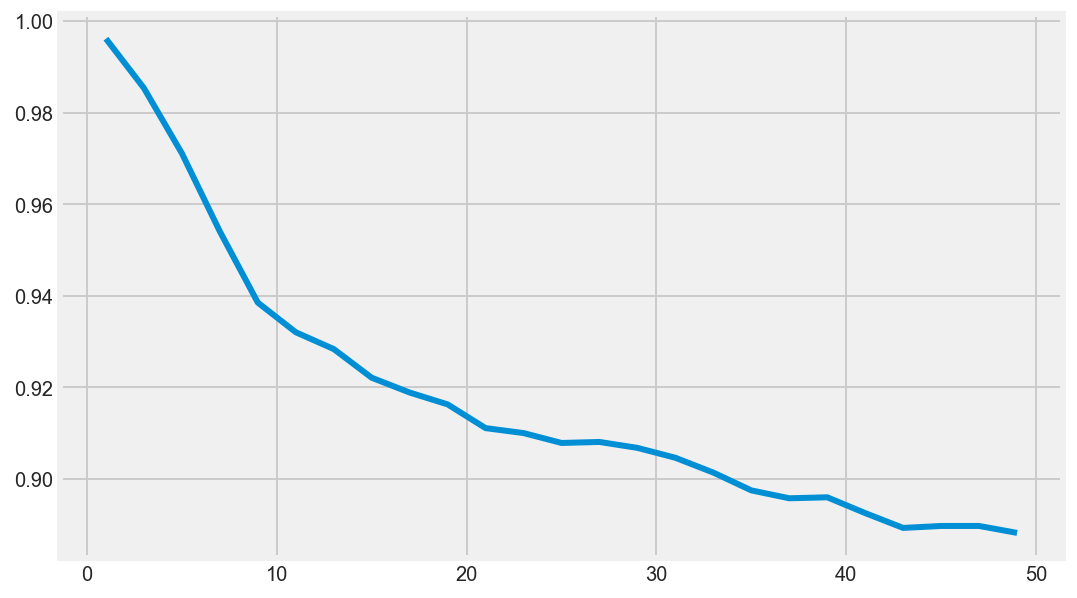

0.9961141689050008


In [107]:
k_values = list(range(1,50,2))
accs = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_resampled, y_resampled, cv=10)
    accs.append(np.mean(scores))
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(k_values, accs, lw=3)
plt.show()

print(np.max(accs))

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

*Calculate the accuracy on the test set and compare to baselin*

In [120]:
print(knn.score(X_test, y_test), 1. - np.mean(y_test))

0.9859762675296656 0.43527508090614886


**Calculate the predicted labels and predicted probabilities on the test set.**

In [121]:
# predict test class:
y_pred = knn.predict(X_test)

# predicted test probability:
y_pp = knn.predict_proba(X_test)
list(zip(y_pred,y_test))

[(0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 

Create the confusion matrix for your classfier's performance on the test set.

In [118]:
df1 = pd.DataFrame(columns=['y_test','y_predict'])
df1.y_test=y_test
df1.y_predict=y_pred
print(df1[df1['y_test']==df1['y_predict']].count(),'y_test=',len(y_test))

y_test       1831
y_predict    1831
dtype: int64 y_test= 1854


# Random Forest tree

f one or a few features are very strong predictors for the response variable (target output), these features will be selected in many of the bagging base trees, causing them to become correlated. By selecting a random subset of the features at each split, we avoid this correlation between base trees, strengthening the overall model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#rf = RandomForest(n_estimators=1000, max_depth=None, max_features='auto')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Xtrain, Xtest, ytrain, ytest = train_test_split(X_resampled, y_resampled, test_size=0.33)

clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(Xtrain, ytrain)

In [ ]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(Xtest)

In [ ]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(Xtest)[0:10]

In [ ]:
list(zip(Xs,clf.feature_importances_))

In [ ]:
clf.score